<a href="https://colab.research.google.com/github/Sanjay7127/OASIS_INTERNSHIP/blob/main/OASIS_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK-1 : IRIS FLOWER CLASSIFICATION

    Author : Prakash sanjay palani
    Batch : January phase 1 AICTE OIB-SIP 2025
    Domain : Data Science

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris=load_iris()

In [ ]:
X = iris.data[:,  [2,3]]
Y = iris.target

In [ ]:
import pandas as pd
iris_df = pd.DataFrame(data=iris.data[:, [2,3]], columns=iris.feature_names[2:])
iris_df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [ ]:
iris_df.shape

(150, 2)

In [ ]:
print(iris_df.head())

   petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2


In [ ]:
import numpy as np
print('/n' + 'The unique labels in this data are ' + str(np.unique(Y)))

/nThe unique labels in this data are [0 1 2]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
X_train.shape

(105, 2)

In [ ]:
X_test.shape

(45, 2)

In [ ]:
print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))
print()

There are 105 samples in the training set and 45 samples in the test set



In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
print('After standardizing our features, the first 5 rows of our data now look like this:\n')
print(pd.DataFrame(X_train_std, columns=iris_df.columns).head())

After standardizing our features, the first 5 rows of our data now look like this:

   petal length (cm)  petal width (cm)
0          -0.182950         -0.293181
1           0.930661          0.737246
2           1.042022          1.638870
3           0.652258          0.350836
4           1.097702          0.737246


<ipython-input-26-3c523402bf00>:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[Y == cl,0], y=X[Y == cl,1],


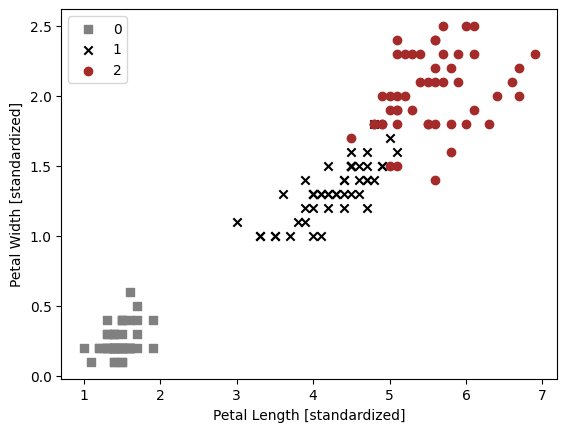

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

markers = ('s','x','o')
colors = ('grey','black','brown')
cmap = ListedColormap(colors[:len(np.unique(Y_test))])
for idx,cl in enumerate(np.unique(Y_test)):
    plt.scatter(x=X[Y == cl,0], y=X[Y == cl,1],
                c=cmap(idx), marker=markers[idx], label=cl)
plt.xlabel('Petal Length [standardized]')
plt.ylabel('Petal Width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, gamma=0.10, random_state=0)
svm.fit(X_train_std, Y_train)

print('The accuracy of the SVM classifier on the training data is {:.2f}'.format(svm.score(X_train_std, Y_train)))

print('The accuracy of the SVM classifier on the test data is {:.2f}'.format(svm.score(X_test_std, Y_test)))

The accuracy of the SVM classifier on the training data is 0.95
The accuracy of the SVM classifier on the test data is 0.98


In [ ]:
import warnings

warnings.filterwarnings('ignore')
def versiontuple(v):
    return tuple(map(int, (v.split("."))))

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)


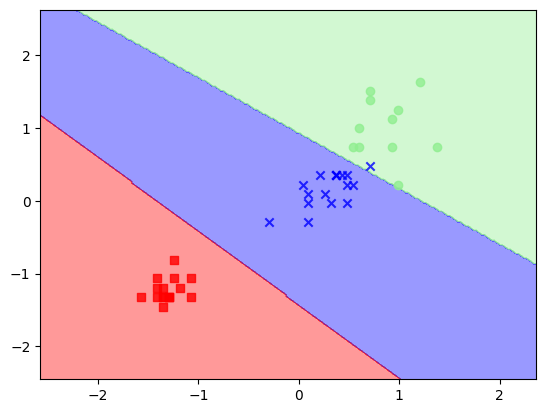

In [ ]:
plot_decision_regions(X_test_std, Y_test, classifier=svm)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, Y_train)

print('The accuracy of the KNN classifier on the training data is {:.2f}'.format(knn.score(X_train_std, Y_train)))
print('The accuracy of the KNN classifier on the test data is {:.2f}'.format(knn.score(X_test_std, Y_test)))

The accuracy of the KNN classifier on the training data is 0.95
The accuracy of the KNN classifier on the test data is 1.00


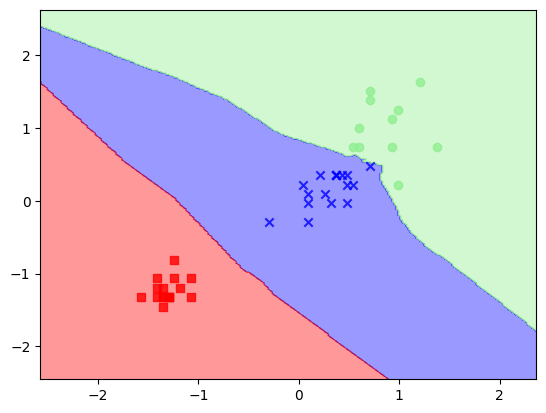

In [ ]:
plot_decision_regions(X_test_std, Y_test, classifier=knn)